<a href="https://colab.research.google.com/github/Zncl2222/MachineLearningPractice/blob/pytorch_tutorial/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

In [8]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end ,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [9]:
len(X), len(y)

(50, 50)

In [11]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [12]:
def plot_predictions(
  train_data=X_train,
  train_labels=y_train,
  test_data=X_test,
  test_labels=y_test,
  predictions=None
):
  """
  Plot training data, test data and compares prediction
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label='Training Data')
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions Data")
  plt.legend(fontsize=14)

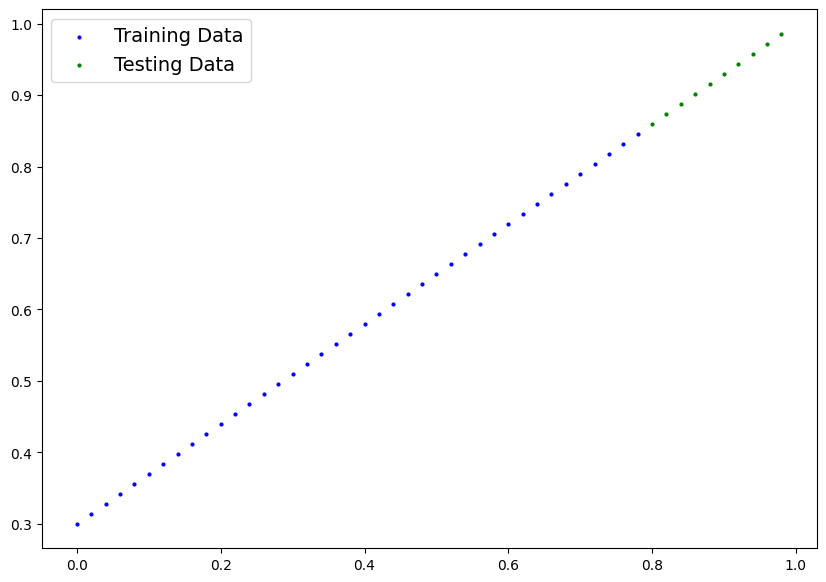

In [25]:
plot_predictions()

In [74]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(
      torch.randn(
        1,
        dtype=torch.float
      )
    )
    # We don't need to specify requires_grad = True in torch.randn
    # Because nn.Parameter use requires_grad = True as default
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [91]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
print(list(model_0.parameters()))
print(model_0.state_dict())

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [92]:
# Run model without torch.inference_mode
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [93]:
# Make predictions without training]
# Inference mode turn gradient tracking off
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

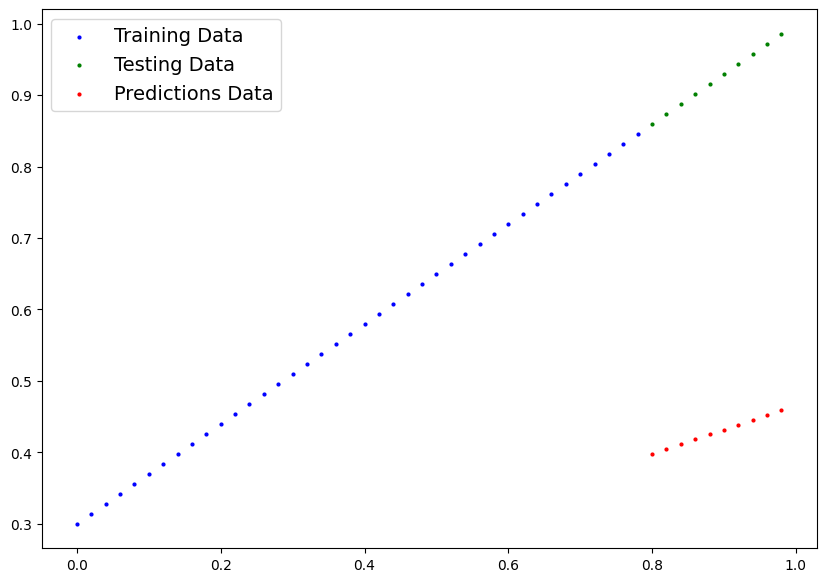

In [94]:
plot_predictions(predictions=y_preds)

In [95]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(
  params=model_0.parameters(),
  lr=0.01  # learning rate
)

print(optimizer, loss_fn)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
) L1Loss()


In [96]:
# Training Configs

epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

In [97]:
# Training
for epoch in range(epochs):
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)


  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to
  #   the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval() # Evaluation mode (This will turn off functionality used for training)
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch %10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss {test_loss}")
    print(f"Parameter: {model_0.state_dict()}")

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss 0.48106518387794495
Parameter: OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss 0.3463551998138428
Parameter: OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss 0.21729660034179688
Parameter: OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss 0.14464017748832703
Parameter: OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss 0.11360953003168106
Parameter: OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss 0.09919948130846024
Parameter: OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss 0.08886633068323135
Paramete

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190] [array(0.31288138, dtype=float32), array(0.19767132, dtype=float32), array(0.08908726, dtype=float32), array(0.05314853, dtype=float32), array(0.04543797, dtype=float32), array(0.04167863, dtype=float32), array(0.03818933, dtype=float32), array(0.0347609, dtype=float32), array(0.03132383, dtype=float32), array(0.0278874, dtype=float32), array(0.02445896, dtype=float32), array(0.02102021, dtype=float32), array(0.01758547, dtype=float32), array(0.01415539, dtype=float32), array(0.01071659, dtype=float32), array(0.00728353, dtype=float32), array(0.00385178, dtype=float32), array(0.00893248, dtype=float32), array(0.00893248, dtype=float32), array(0.00893248, dtype=float32)] [tensor(0.4811), tensor(0.3464), tensor(0.2173), tensor(0.1446), tensor(0.1136), tensor(0.0992), tensor(0.0889), tensor(0.0806), tensor(0.0723), tensor(0.0647), tensor(0.0565), tensor(0.0482), tensor(0.0406), tensor(0.0323), tensor

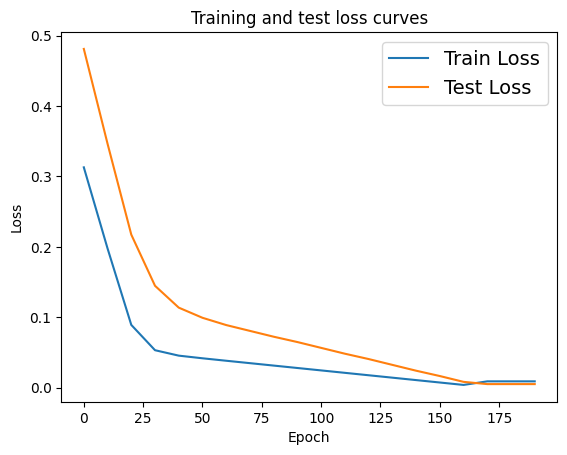

In [98]:
# Plot the loss curves
print(epoch_count, loss_values, test_loss_values)
plt.plot(epoch_count, loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(fontsize=14)

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


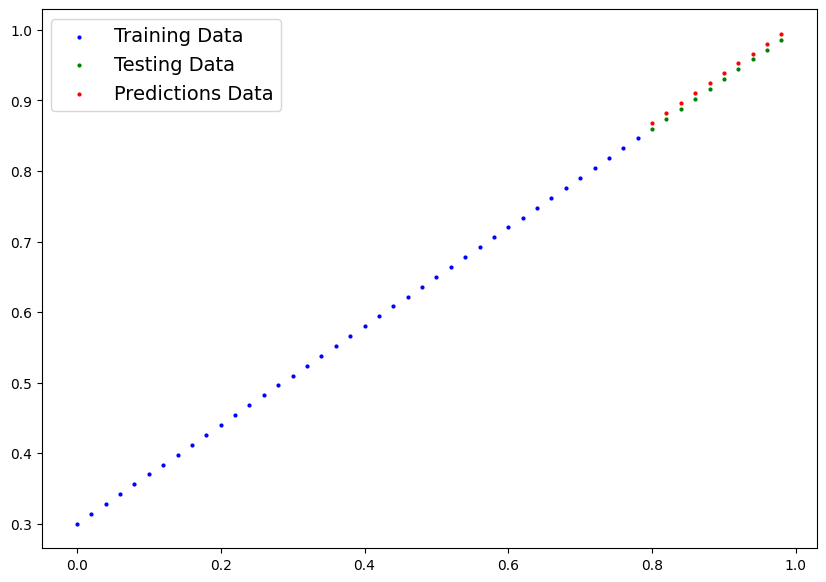

In [99]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

print(model_0.state_dict())
plot_predictions(predictions=y_preds_new)

In [113]:
# Saving model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

In [114]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1680 Mar  9 10:22 01_pytorch_workflow_model_0.pth


In [115]:
loaded_model_0 = LinearRegressionModel()

print(loaded_model_0.state_dict())

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

print(loaded_model_0.state_dict())

OrderedDict([('weights', tensor([-0.7658])), ('bias', tensor([-0.7506]))])
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])


In [116]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [117]:
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [118]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [119]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Create LinearRegression V2

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end ,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [34]:
# Building a Pytorch Linear model

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for create teh model parameters
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [35]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [36]:
device = 'cuda'
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [37]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [38]:
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # Forward Pass
  y_pred = model_1(X_train)

  # Calculate the Loss
  loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Perform backpropagation
  loss.backward()

  # Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [39]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [40]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

print(y_preds)

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')


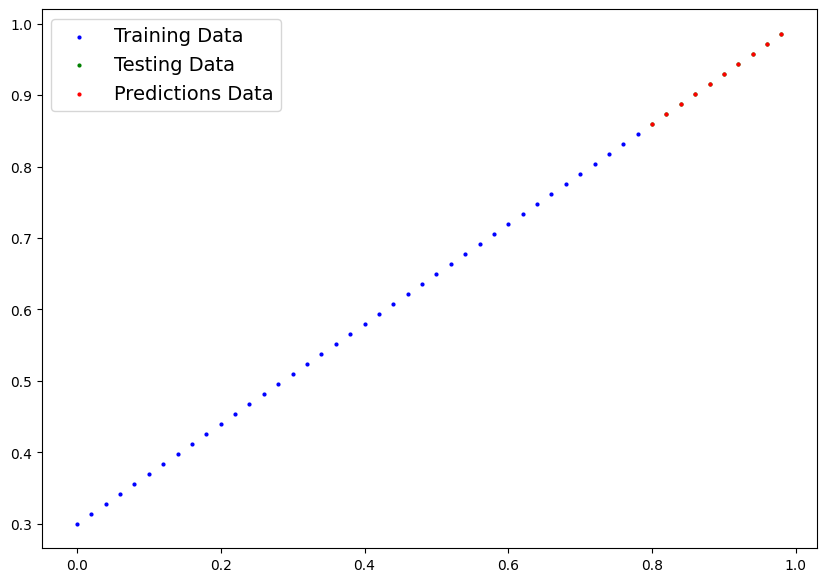

In [41]:
plot_predictions(
  train_data=X_train.cpu(),
  train_labels=y_train.cpu(),
  test_data=X_test.cpu(),
  test_labels=y_test.cpu(),
  predictions=y_preds.cpu()
)

In [45]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [47]:
loaded_model_1 = LinearRegressionModelV2()
print(loaded_model_1.state_dict())

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
print(loaded_model_1.state_dict())

OrderedDict([('linear_layer.weight', tensor([[-0.2343]])), ('linear_layer.bias', tensor([0.9186]))])
OrderedDict([('linear_layer.weight', tensor([[0.6968]])), ('linear_layer.bias', tensor([0.3025]))])


In [50]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [53]:
loaded_model_1.cuda()

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')